In [1]:
%%HTML
<style type='text/css'>
    *{
        # background-color:#E3EDCD;
        # background-color:black;
        # color:white;
        
    }
    h1{
        color:#1976d2;
    }
    h2{
        color:#f57c00;
    }
    h3{
        color:#ba37ff;
    }
    h4{
        color:green;
    }
    table{
        border:1px solid black !important;
        border-collapse:collapse !important;
    }
    th{
        background-color:blueviolet !important;
        text-align:center;
        color:white;
    }
    th,td{
        border:0.1px solid black !important;
        transition:0.2s all liner;
        
    }
    td:hover{
        transform:scale(1.1);
        background-color:orange;
        color:blueviolet;
    }
    .raw{
        white-space:pre;
    }
    .atcenter{
        text-align:center !important;
    }
    .imp{
        color:red;
        font-weight:bolder;
    }
</style>

## 4.13 Matplotlib自定义：配置文件与样式表


Matplotlib 的默认图形设置经常被用户诟病。虽然 Matplotlib 2.0 版本已
经有大幅改善，但是掌握自定义配置的方法可以让我们打造自己的艺术
风格。    
首先简单浏览一下 Matplotlib 的运行时配置（runtime
configuration，rc）功能的介绍，然后再看看新式的样式表
（stylesheets）特性，里面包含了许多漂亮的默认配置功能。

### 4.13.1 手动配置图形

通过本章的介绍，我们已经知道如何修改单个图形配置，使得最终图形
比原来的图形更好看。可以为每个单独的图形进行个性化设置。举个例
子，看看由下面这个土到掉渣的默认配置生成的频次直方图（如图 4-81
所示）：

In [2]:
import matplotlib.pyplot as plt
import numpy as np

(array([  1.,  11.,  49., 120., 228., 270., 186.,  90.,  32.,  13.]),
 array([-3.5779885 , -2.90874052, -2.23949254, -1.57024456, -0.90099659,
        -0.23174861,  0.43749937,  1.10674735,  1.77599533,  2.44524331,
         3.11449128]),
 <BarContainer object of 10 artists>)

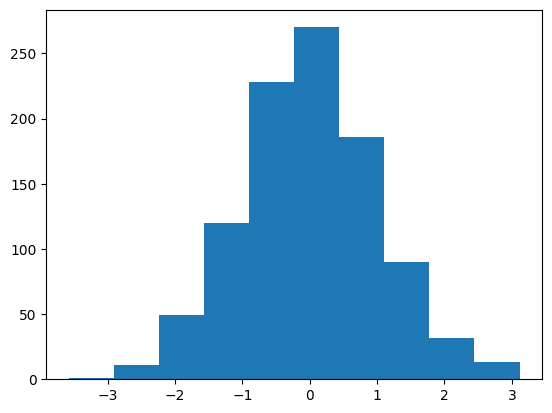

In [3]:
x = np.random.randn(1000)
plt.hist(x)

<p class='atcenter'>图 4-81：Matplotlib 默认配置的频次直方图</p>

通过手动调整，可以让它成为美图，最终效果如图 4-82 所示：

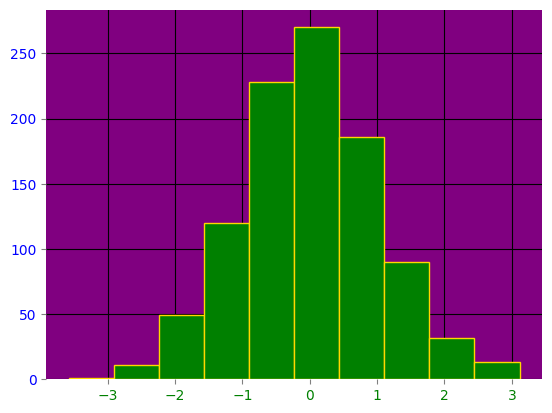

In [21]:
# 用紫色背景
ax = plt.axes(facecolor='purple') #书中写的axisbg早就已经被取消了!!!
ax.set_axisbelow(True)
# 画上黑色的网格线
plt.grid(color='black', linestyle='solid')
# 隐藏坐标轴的线条
for spine in ax.spines.values():
    spine.set_visible(False)
# 隐藏上边与右边的刻度

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
# 弱化刻度与标签
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels(): #可以利用.get_xticklabels获得x轴的标签的值
    tick.set_color('green')
for tick in ax.get_yticklabels():
    tick.set_color('blue')
# 设置频次直方图轮廓色与填充色
ax.hist(x, edgecolor='gold', color='green');

<p class='atcenter'>图 4-82：手动配置的频次直方图</p>

In [7]:
plt.axes?

Signature: plt.axes(arg: 'None | tuple[float, float, float, float]' = None, **kwargs) -> 'matplotlib.axes.Axes'
Docstring:
Add an Axes to the current figure and make it the current Axes.

Call signatures::

    plt.axes()
    plt.axes(rect, projection=None, polar=False, **kwargs)
    plt.axes(ax)

Parameters
----------
arg : None or 4-tuple
    The exact behavior of this function depends on the type:

    - *None*: A new full window Axes is added using
      ``subplot(**kwargs)``.
    - 4-tuple of floats *rect* = ``(left, bottom, width, height)``.
      A new Axes is added with dimensions *rect* in normalized
      (0, 1) units using `~.Figure.add_axes` on the current figure.

projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
    The projection type of the `~.axes.Axes`. *str* is the name of
    a custom projection, see `~matplotlib.projections`. The default
    None results in a 'rectilinear' projection.

polar : bool, default: Fals

这样看起来就漂亮多了。你可能会觉得它的风格与 R 语言的 ggplot 可
视化程序包有点儿像。但这样设置可太费劲儿了！我们肯定不希望每做
一个图都需要这样手动配置一番。好在已经有一种方法，可以让我们只
配置一次默认图形，就能将其应用到所有图形上。

### 4.13.2 修改默认配置：rcParams

Matplotlib 每次加载时，都会定义一个运行时配置（<span class=imp>r</span>untime<span class='imp'>c</span>onfigure），其中包含了
所有你创建的图形元素的默认风格。你可以用 plt.rc 简便方法随时修
改这个配置。来看看如何调整 rc 参数，用默认图形实现之前手动调整
的效果。


先复制一下目前的 rcParams 字典，这样可以在修改之后再还原回来：

In [22]:
Ipython_default = plt.rcParams.copy()

现在就可以用 plt.rc 函数来修改配置参数了：

In [23]:
from matplotlib import cycler
colors = cycler('color',
['#EE6666', '#3388BB', '#9988DD',
'#EECC55', '#88BB44', '#FFBBBB'])
# 设置坐标轴
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
axisbelow=True, grid=True, prop_cycle=colors)
# 设置网格线
plt.rc('grid', color='w', linestyle='solid')
# 设置x坐标轴的标签
plt.rc('xtick', direction='out', color='gray')
# 设置y坐标轴的标签
plt.rc('ytick', direction='out', color='gray')
# 设置填充色
plt.rc('patch', edgecolor='#E6E6E6')
# 设置线的粗细
plt.rc('lines', linewidth=2) 

设置完成之后，来创建一个图形看看效果（如图 4-83 所示）：

(array([  1.,  11.,  49., 120., 228., 270., 186.,  90.,  32.,  13.]),
 array([-3.5779885 , -2.90874052, -2.23949254, -1.57024456, -0.90099659,
        -0.23174861,  0.43749937,  1.10674735,  1.77599533,  2.44524331,
         3.11449128]),
 <BarContainer object of 10 artists>)

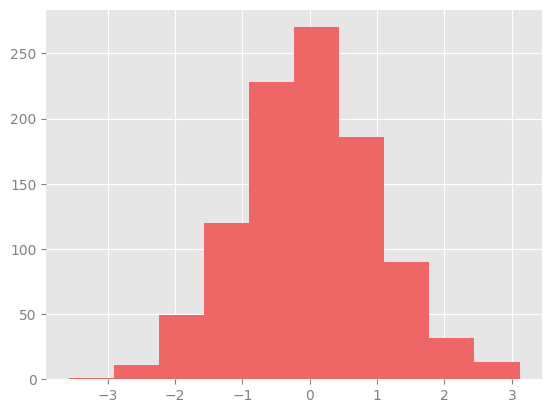

In [24]:
plt.hist(x)

<p class='atcenter'>图 4-83：用 rc 函数自定义频次直方图</p>

再画一些线图看看 rc 参数的效果（如图 4-84 所示）：

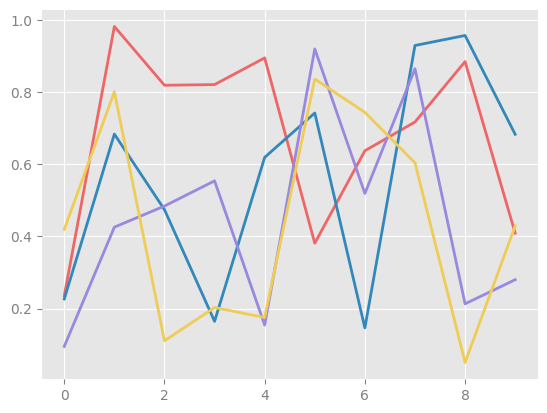

In [25]:
for i in range(4):
    plt.plot(np.random.rand(10))

<p class='atcenter'>图 4-84：自定义风格的线图</p>

新的艺术风格比之前的默认风格更漂亮了。如果你不认同我的审美风
格，当然可以自己调整 rc 参数，创造自己的风格！这些设置会保存在
.matplotlibrc 文件中，你可以在 Matplotlib 文档
（http://matplotlib.org/users/customizing.html）中找到更多信息。这时有
人说了，他们更喜欢自定义 Matplotlib 的样式表。

### 4.13.3 样式表

2014 年 8 月发布的 Matplotlib 1.4 版本中增加了一个非常好用的 style
模块，里面包含了大量的新式默认样式表，还支持创建和打包你自己的
风格。虽然这些样式表实现的格式功能与前面介绍的 .matplotlibrc 文件
类似，但是它的文件扩展名是 .mplstyle。  
即使你不打算创建自己的绘图风格，样式表包含的默认内容也非常有
用。通过 plt.style.available 命令可以看到所有可用的风格，下面
将简单介绍前五种风格：

In [27]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

使用某种样式表的基本方法如下所示：


```ipython
plt.style.use('stylename')
```

但需要注意的是，这样会改变后面所有的风格！如果需要，你可以使用
风格上下文管理器（context manager）临时更换至另一种风格：

In [35]:
plt.style.use('default')

Signature: plt.style.use(style)
Docstring:
Use Matplotlib style settings from a style specification.

The style name of 'default' is reserved for reverting back to
the default style settings.

.. note::

   This updates the `.rcParams` with the settings from the style.
   `.rcParams` not defined in the style are kept.

Parameters
----------
style : str, dict, Path or list

    A style specification. Valid options are:

    str
        - One of the style names in `.style.available` (a builtin style or
          a style installed in the user library path).

        - A dotted name of the form "package.style_name"; in that case,
          "package" should be an importable Python package name, e.g. at
          ``/path/to/package/__init__.py``; the loaded style file is
          ``/path/to/package/style_name.mplstyle``.  (Style files in
          subpackages are likewise supported.)

        - The path or URL to a style file, which gets loaded by
          `.rc_params_from_file`.

    dict

但是不用过于担心，可以使用
```ipython
plt.style.use('default')
```
将其改为原来的样式,读本书时有些部分确实有些小题大作之意,有些地方需要自己修补完善

```ipython
with plt.style.context('stylename'):
    make_a_plot()
```

来创建一个可以画两种基本图形的函数：

In [29]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

下面就用这个函数来演示不同风格的显示效果。

#### 01. 默认风格

<span class='imp'>默认风格就是本书前面内容中一直使用的风格，我们就从这里开
始。首先，将之前设置的运行时配置还原为默认配置：</span>

In [30]:
# 重置rcParams
plt.rcParams.update(Ipython_default)

现在来看看默认风格的效果（如图 4-85 所示）：

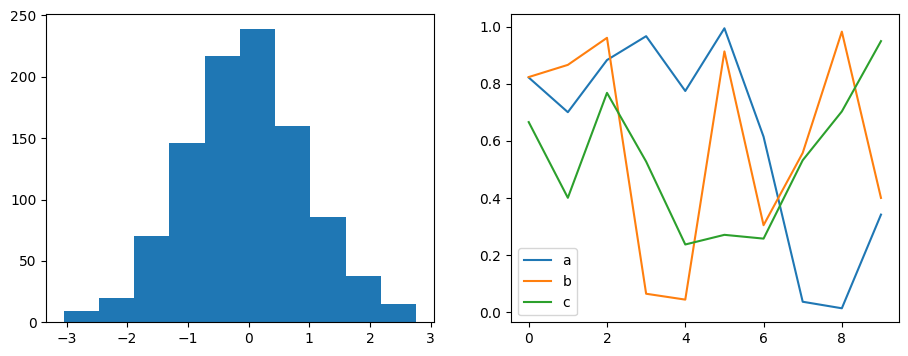

In [31]:
hist_and_lines()

<p class='atcenter'>图 4-85：Matplotlib 的默认风格</p>

#### 02. FiveThirtyEight风格

FiveThirtyEight 风格模仿的是著名网站
FiveThirtyEight（http://fivethirtyeight.com）的绘图风格。如图 4-86
所示，这种风格使用深色的粗线条和透明的坐标轴：

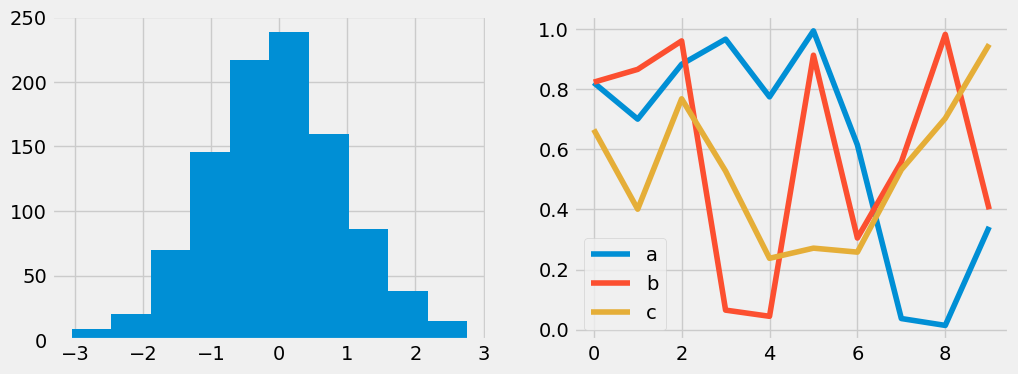

In [32]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

<p class='atcenter'>图 4-86：FiveThirtyEight 风格</p>

## 更好地使用样式表并重新设置为默认样式的流程代码

In [36]:
plt.style.use('fivethirtyeight') #利用fivethirtyeight

(np.float64(-3.9126124863257497),
 np.float64(3.4491152721083385),
 np.float64(0.0),
 np.float64(283.5))

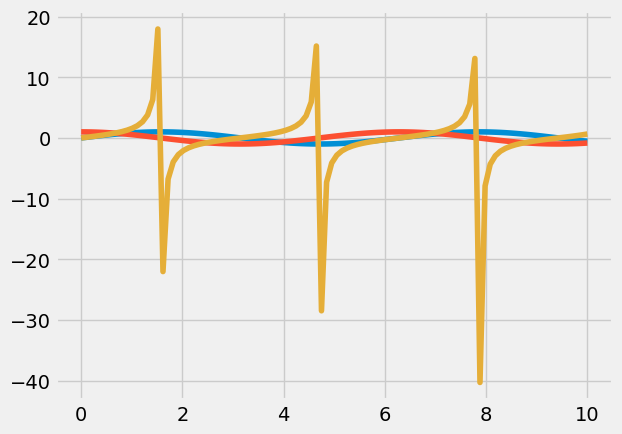

In [43]:
x_ = np.linspace(0,10,100)
plt.plot(x_,np.sin(x_))
plt.plot(x_,np.cos(x_))
plt.plot(x_,np.tan(x_))
ax.axis('equal')

In [44]:
plt.style.use('default') #重置为default样式

(np.float64(-3.9126124863257497),
 np.float64(3.4491152721083385),
 np.float64(0.0),
 np.float64(283.5))

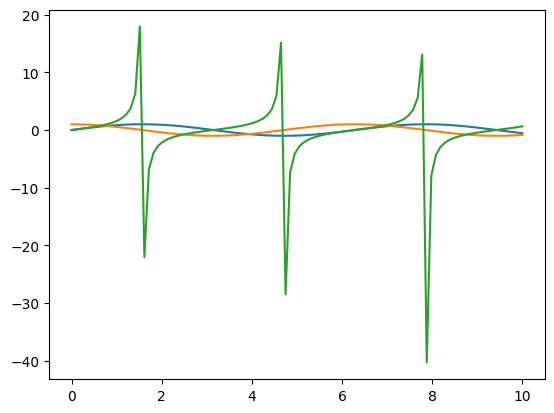

In [45]:
x_ = np.linspace(0,10,100)
plt.plot(x_,np.sin(x_))
plt.plot(x_,np.cos(x_))
plt.plot(x_,np.tan(x_))
ax.axis('equal')

#### 03. ggplot风格

R 语言的 ggplot 是非常流行的可视化工具，Matplotlib 的 ggplot
风格就是模仿这个程序包的默认风格（如图 4-87 所示）：

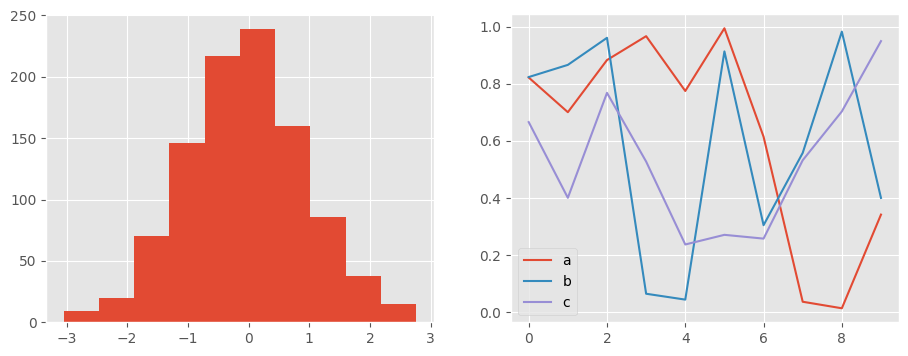

In [33]:
with plt.style.context('ggplot'):
    hist_and_lines()

<p class='atcenter'>图 4-87：ggplot 风格</p>

#### 04. bmh风格

有一本短小精悍的在线图书叫 Probabilistic Programming and
Bayesian Methods for Hackers（http://bit.ly/2fDJsKC）。整本书的图
形都是用 Matplotlib 创建的，通过一组 rc 参数创建了一种引人注
目的绘图风格。这个风格被 bmh 样式表继承了（如图 4-88 所
示）：


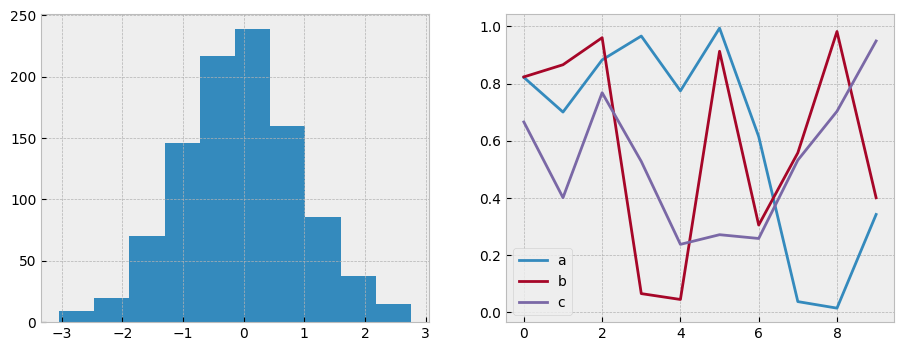

In [48]:
with plt.style.context('bmh'):
    hist_and_lines()

<p class='atcenter'>图 4-88：bmh 风格</p>

### 05. 黑色背景风格

在演示文档中展示图形时，用黑色背景而非白色背景往往会取得更
好的效果。dark_background 风格就是为此设计的（如图 4-89 所
示）：

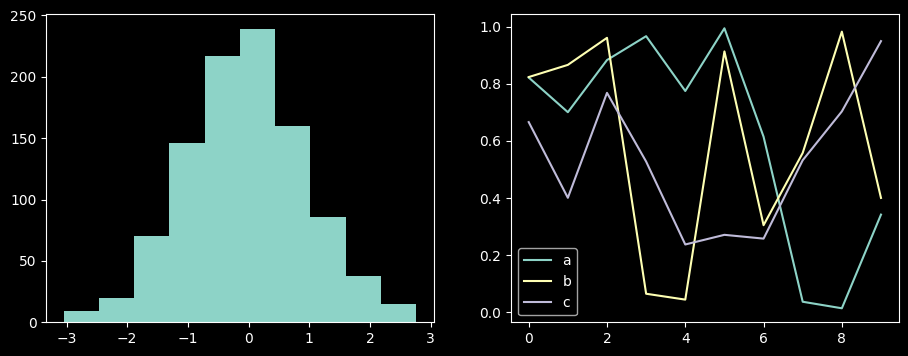

In [50]:
with plt.style.context('dark_background'):
    hist_and_lines()

<p class='atcenter'>图 4-89：dark_background 风格</p>

#### 06. 灰度风格

有时你可能会做一些需要打印的图形，不能使用彩色。这时使用
grayscale 风格的效果最好，如图 4-90 所示：

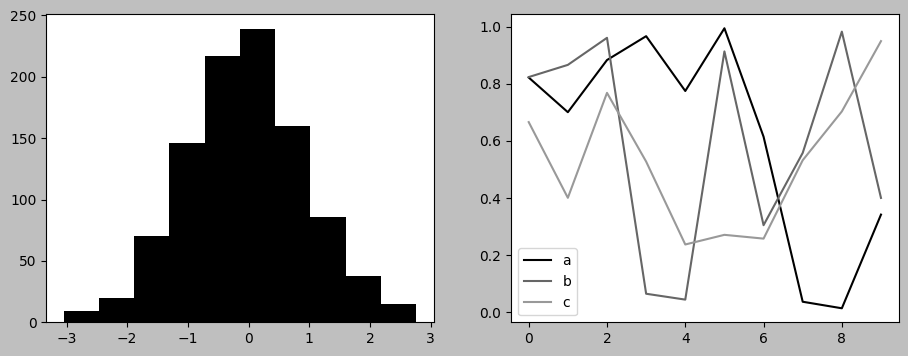

In [51]:
with plt.style.context('grayscale'):
    hist_and_lines()

<p class='atcenter'>图 4-90：grayscale 风格</p>

#### 07. Seaborn风格

Matplotlib 还有一些灵感来自 Seaborn 程序库（将在 4.16 节详细介
绍）的风格，这些风格在 Notebook 导入 Seaborn 程序库后会自动
加载。我觉得这些风格非常漂亮，也是我自己在探索数据时一直使
用的默认风格（如图 4-91 所示）：

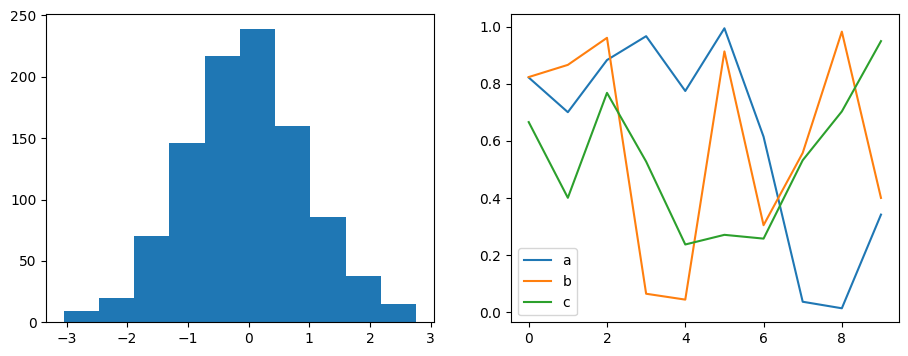

In [53]:
import seaborn
hist_and_lines()

<p class='atcenter'>图 4-91：Seaborn 绘图风格</p>

通过运用各式各样的内置绘图风格，Matplotlib 在交互式可视化与
创建印刷品图形两方面都表现得越来越好。在创建这本书的图形
时，我通常会用一种或几种内置的绘图风格。

## 4.14 用Matplotlib画三维图

Matplotlib 原本只能画二维图。大概在 1.0 版本的时候，Matplotlib 实现
了一些建立在二维图基础上的三维图功能，于是一组画三维图可视化的
便捷（尚不完美）工具便诞生了。我们可以导入 Matplotlib 自带的
mplot3d 工具箱来画三维图（如图 4-92 所示）：

导入需要的模块

In [54]:
from mpl_toolkits import mplot3d

导入这个子模块之后，就可以在创建任意一个普通坐标轴的过程中加入
projection='3d' 关键字，从而创建一个三维坐标轴：

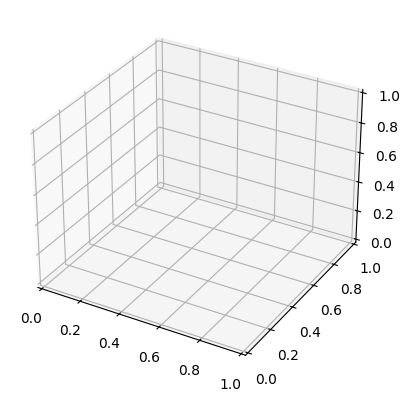

In [55]:
fig = plt.figure()
ax = plt.axes(projection='3d')

<p class='atcenter'>图 4-92：一个空的三维坐标轴</p>

有了三维坐标轴之后，我们就可以在上面画出各种各样的三维图了。三
维图的优点是在 Notebook 里面可以交互浏览而非静止不动；和之前介
绍的交互式图形一样，需要用 %matplotlib notebook 而不是%matplotlib inline 运行代码。

### 4.14.1 三维数据点与线

最基本的三维图是由 (x , y , z ) 三维坐标点构成的线图与散点图。与前面
介绍的普通二维图类似，可以用 ax.plot3D 与 ax.scatter3D 函数来
创建它们。由于三维图函数的参数与前面二维图函数的参数基本相同，
因此你可以参考 4.3 节和 4.4 节的内容，获取关于控制输出结果的更多
信息。下面来画一个三角螺旋线（trigonometric spiral），在线上随机分
布一些散点（如图 4-93 所示）：

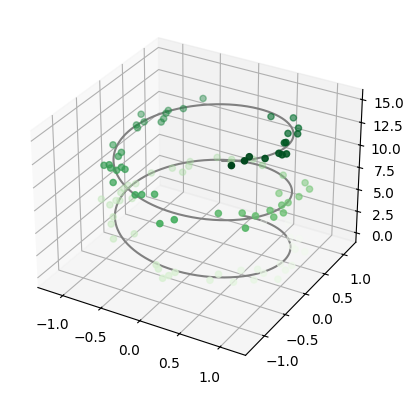

In [58]:
ax = plt.axes(projection='3d')
# 三维线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# 三维散点的数据
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

<p class='atcenter'>图 4-93：三维点线图</p>

默认情况下，散点会自动改变透明度，以在平面上呈现出立体感。有时
在静态图形上观察三维效果很费劲，通过交互视图（interactive view）
就可以让所有数据点呈现出极佳的视觉效果。

### 4.14.2 三维等高线图

与 4.6 节介绍的等高线类似，mplot3d 也有用同样的输入数据创建三维
晕渲（relief）图的工具。与二维 ax.contour 图形一
样，ax.contour3D 要求所有数据都是二维网格数据的形式，并且由函
数计算 z 轴数值。下面演示一个用三维正弦函数画的三维等高线图（如
图 4-94 所示）：


In [59]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


Text(0.5, 0, 'z')

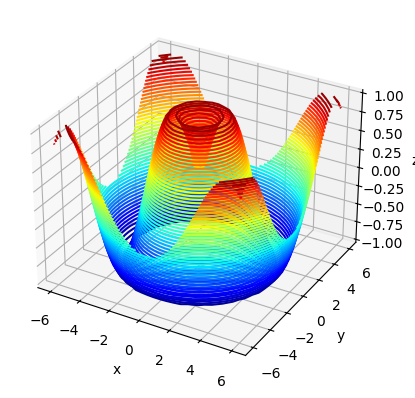

In [61]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

<p class='atcenter'>图 4-94：三维等高线图</p>

默认的初始观察角度有时不是最优的，view_init 可以调整观察角度与
方位角（azimuthal angle）。在这个示例中（结果如图 4-95 所示），我
们把俯仰角调整为 60 度（这里的 60 度是 x-y 平面的旋转角度），方位
角调整为 35 度（就是绕 z 轴顺时针旋转 35 度）：

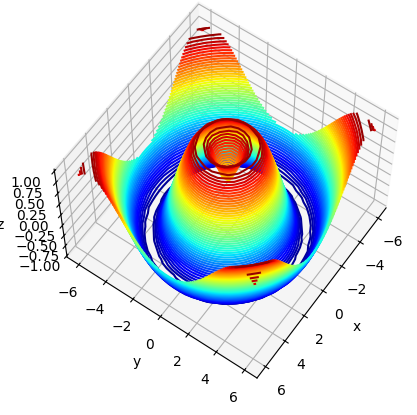

In [62]:
ax.view_init(60, 35)
fig

<p class='atcenter'>图 4-95：调整三维图的观察视角</p>

其实，也可以在 Matplotlib 的交互式后端界面直接通过点击、拖拽图
形，实现同样的交互旋转效果。


### 4.14.3 线框图和曲面图

还有两种画网格数据的三维图没有介绍，就是线框图和曲面图。它们都
是将网格数据映射成三维曲面，得到的三维形状非常容易可视化。下面
是一个线框图示例（如图 4-96 所示）：

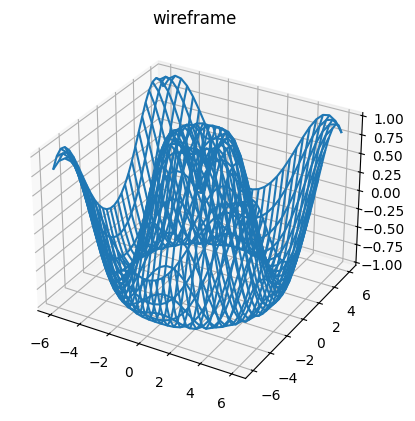

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z,cmap='jet')
ax.set_title('wireframe');

<p class='atcenter'>图 4-96：线框图</p>

曲面图与线框图类似，只不过线框图的每个面都是由多边形构成的。只
要增加一个配色方案来填充这些多边形，就可以让读者感受到可视化图
形表面的拓扑结构了（如图 4-97 所示）：

Text(0.5, 0.92, 'surface')

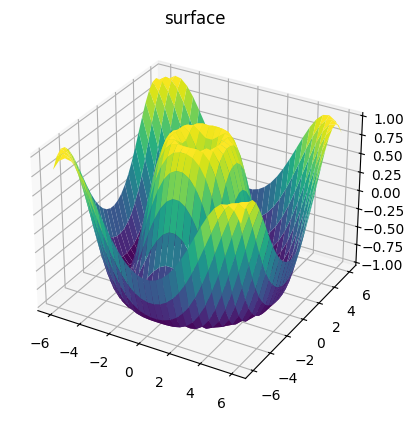

In [65]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='viridis', edgecolor='none')
ax.set_title('surface')

<p class='atcenter'>图 4-97：三维曲面图</p>

需要注意的是，画曲面图需要二维数据，但可以不是直角坐标系（也可
以用极坐标）。下面的示例创建了一个局部的极坐标网格（polar
grid），当我们把它画成 surface3D 图形时，可以获得一种使用了切片
的可视化效果（如图 4-98 所示）：

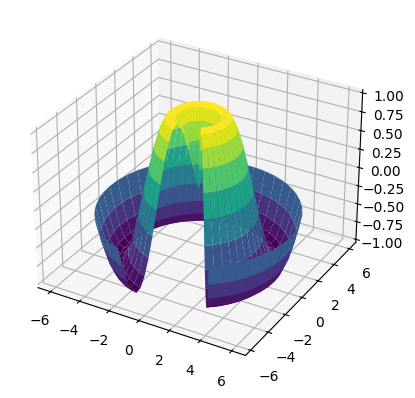

In [66]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='viridis', edgecolor='none')

<p class='atcenter'>图 4-98：极坐标曲面图</p>

### 4.14.4 曲面三角剖分

在某些应用场景中，上述这些要求均匀采样的网格数据显得太过严格且
不太容易实现。这时就可以使用三角剖分图形（triangulation-based
plot）了。如果没有笛卡尔或极坐标网格的均匀绘制图形，我们该如何
用一组随机数据画图呢？

In [67]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

可以先为数据点创建一个散点图，对将要采样的图形有一个基本认识
（如图 4-99 所示）：


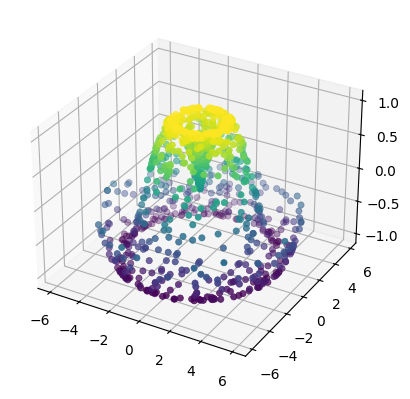

In [68]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

<p class='atcenter'>图 4-99：三维采样的曲面图</p>

还有许多地方需要修补，这些工作可以由 ax.plot_trisurf 函数帮助
我们完成。它首先找到一组所有点都连接起来的三角形，然后用这些三
角形创建曲面（结果如图 4-100 所示，其中 x、y 和 z 参数都是一维数
组）：


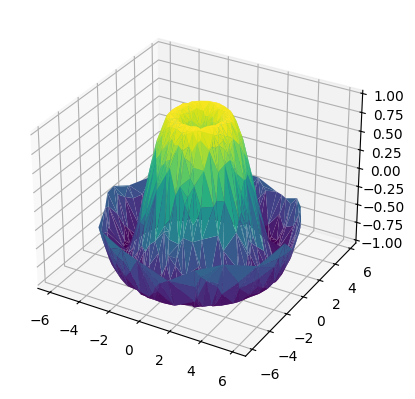

In [69]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
    cmap='viridis', edgecolor='none')

<p class='atcenter'>图 4-100：三角剖分曲面图</p>

虽然结果肯定没有之前用均匀网格画的图完美，但是这种三角剖分方法
很灵活，可以创建各种有趣的三维图。例如，可以用它画一条三维的莫
比乌斯带，下面就来进行演示。   
案例：莫比乌斯带    
莫比乌斯带是把一根纸条扭转 180 度后，再把两头粘起来做成的纸带
圈。从拓扑学的角度看，莫比乌斯带非常神奇，因为它总共只有一个
面！下面我们就用 Matplotlib 的三维工具来画一条莫比乌斯带。此时的
关键是想出它的绘图参数：由于它是一条二维带，因此需要两个内在维
度（intrinsic dimensions）。让我们把一个维度定义为 θ，取值范围为
0-2π；另一个维度是 w，取值范围是 -1-1，表示莫比乌斯带的宽度：

In [70]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

有了参数之后，我们必须确定带上每个点的直角坐标 ( x, y, z )。   
仔细思考一下，我们可能会找到两种旋转关系：一种是圆圈绕着圆心旋
转（角度用 θ 定义），另一种是莫比乌斯带在自己的坐标轴上旋转（角
度用 Φ 定义）。因此，对于一条莫比乌斯带，我们必然会有环的一半
扭转 180 度，即 ΔΦ = Δθ / 2。

In [71]:
phi = 0.5 * theta

现在用我们的三角学知识将极坐标转换成三维直角坐标。定义每个点到
中心的距离（半径）r，那么直角坐标 ( x, y, z ) 就是：

In [72]:
# x - y平面内的半径
r = 1 + w * np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

最后，要画出莫比乌斯带，还必须确保三角剖分是正确的。最好的实现
方法就是首先用基本参数化方法定义三角剖分，然后用 Matplotlib 将这
个三角剖分映射到莫比乌斯带的三维空间里，这样就可以画出图形（如
图 4-101 所示）：


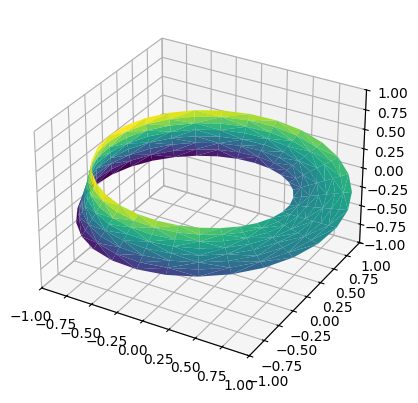

In [73]:
# 用基本参数化方法定义三角剖分
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
    cmap='viridis', linewidths=0.2);
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

<p class='atcenter'>图 4-101：莫比乌斯带</p>

将上面所有的 Matplotlib 函数组合起来，就可以创建出丰富多彩三维图
案了。